In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
import seaborn as sns
sns.set()

##setup needed objects

In [2]:
study_year_begin = 2013
indexes = [1, 2, 3, 4, 5]
show_index = ('year built is 28/26', 'year of improvement is 97/95', 'year reconstructed is 107/105')
ages = list(range(1, 101))
count_exits = [[]]
exposure_count = [[]]
count = 0
bridge_data = {}
hazard_age_list = [[]]


In [3]:
bridgeID = [[1,'Alabama'],
            [2,'Alaska'],
            [4,'Arizona'],
            [5,'Arkansas'],
            [6,'California'],
            [8,'Colorado'],
            [9,'Connecticut'],
            [10,'Delaware'],
            [11,'District of Columbia'],
            [12,'Florida'],
            [13,'Georgia'],
            [15,'Hawaii'],
            [16,'Idaho'],
            [17,'Illinois'],
            [18,'Indiana'],
            [19,'Iowa'],
            [20,'Kansas'],
            [21,'Kentucky'],
            [22,'Louisiana'],
            [23,'Maine'],
            [24,'Maryland'],
            [25,'Massachusettes'],
            [26,'Michigan'],
            [27,'Minnesota'],
            [28,'Mississippi'],
            [29,'Missiuri'],
            [30,'Montana'],
            [31,'Nebraska'],
            [32,'Nevada'],
            [33,'New Hampshire'],
            [34,'New Jersey'],
            [35,'New Mexico'],
            [36,'New York'],
            [37,'North Carolina'],
            [38,'North Dakota'],
            [39,'Ohio'],
            [40,'Oklahoma'],
            [41,'Oregon'],
            [42,'Pennsylvania'],
            [44,'Rhode Island'],
            [45,'South Carolina'],
            [46,'South Dakota'],
            [47,'Tennessee'],
            [48,'Texas'],
            [49,'Utah'],
            [50,'Vermont'],
            [51,'Virginia'],
            [53,'Washington'],
            [54,'West Virginia'],
            [55,'Wisconsin'],
            [56,'Wyoming'],
            [72,'Puerto Rico']]

In [4]:
def import_data():
    """
    import bridge data and store as dataframe, then convert to list of lists
    :return: bridges_list List of Lists
    """
    bridges = pd.read_excel('2017HwyBridgesDelimitedAllStatesMI.xlsx', dtype=str)
#     bridges = bridges_all[bridges_all.STATE_CODE_001 == '26']
    bridges_list = bridges.values.tolist()
    bridges_list2 = [[]]
    for inside_list in bridges_list:
        inside_list = [item.strip(' ') for item in inside_list]
        bridges_list2.append(inside_list)
    del bridges_list2[0]
    bridge_data["data"] = bridges_list2
    # print(bridge_data["data"])
    return bridges_list2


In [5]:
def calc_age(current_study_yr, construction_year, reconstruct_yr):
    """
    by setting the age to 0 in the elif clause, the bridge has effectively been removed from the study
    the age can be reset by setting age to (current_study_yr - reconstruct_yr)
    :return: the age of the bridge
    """
    if reconstruct_yr >= current_study_yr:
        age = current_study_yr - construction_year
    elif reconstruct_yr > construction_year:
        age = 0
    else:
        age = current_study_yr - construction_year
    return age

In [6]:
def calc_ages():
    """
    this function creates the list of bridges and the ages of the bridge in each year of the study
    :return: a list of lists containing the raw exposure data
    """
    bridge_data = import_data()
    exposure_data = [[]]

    for bridge in bridge_data:
        inner_list = []
        inner_list.append(bridge[1])
        inner_list.append(bridge[105])
        for index in indexes:
            age = calc_age(int(study_year_begin) + index - 1, int(bridge[26]), int(bridge[105]))
            inner_list.append(age)
        exposure_data.append(inner_list)
    return exposure_data


In [7]:
output = calc_ages()
# for item in output:
#     print(item)

In [8]:
"""
calculate the total exposure for each age
"""

'\ncalculate the total exposure for each age\n'

In [9]:
for age in ages:
    exposures = []
    count = 0
    exposures.append(age)
    for item in output:
        for index in item:
            if index == age:
                count += 1
    exposures.append(count)
    exposure_count.append(exposures)

In [10]:
# print(exposure_count)

In [11]:
def exits():
    for age in ages:
        exits = []
        count = 0
        exits.append(age)
        pos = [3, 4, 5, 6]
        for item in output:
            if item == []:
                continue
            else:
                for i in pos:
                    if item[i] == 0 and item[i - 1] > 0 and item[i - 1] == age - 1:
                        count += 1
        exits.append(count)
        count_exits.append(exits)
    # for item in count_exits:
    #     print(item)
    return count_exits

In [12]:
def compute_hx():
    """
    ratio of exits() to calc_ages()
    :return: the hazard rate for a bridge at each age
    """
    leave = exits()
    exposed = exposure_count
    for age in exposed:
        if age == []:
            continue
        temp = [age[0]]
        for item in leave:
            if item == []:
                continue
            elif age[0] == item[0]:
                if age[1] == 0:
                    num = 0
                else:
                    num = item[1]/age[1]
                temp.append(num)
        hazard_age_list.append(temp)
    return hazard_age_list



In [13]:
def compute_qx():
    hx = compute_hx()
    qx = [[]]
    for i in hx:
        temp = []
        if i == []:
            continue
        temp.append(i[0])
        sx = math.exp(-i[1])
        pdf = 1 - sx
        temp.append(pdf)
        qx.append(temp)
    return qx

def cum_qx():
    qx = compute_qx()
    cum = [[]]
    running = 0
    for item in qx:
        if item == []:
            continue
        temp = []
        temp.append(item[0])
        running += item[1]
        temp.append(running)
        cum.append(temp)
    return cum

In [14]:
see = compute_qx()
for item in see:
    print(item)

[]
[1, 0.0]
[2, 0.0]
[3, 0.0]
[4, 0.0]
[5, 0.0]
[6, 0.0]
[7, 0.0]
[8, 0.0]
[9, 0.001790509816651964]
[10, 0.0]
[11, 0.0]
[12, 0.0]
[13, 0.0]
[14, 0.0]
[15, 0.0]
[16, 0.0]
[17, 0.0]
[18, 0.0]
[19, 0.0]
[20, 0.0]
[21, 0.0]
[22, 0.0015885620167414016]
[23, 0.0]
[24, 0.0]
[25, 0.0]
[26, 0.0]
[27, 0.0]
[28, 0.0014316389822167652]
[29, 0.0]
[30, 0.0013289034587864457]
[31, 0.0013708017043195797]
[32, 0.0]
[33, 0.0]
[34, 0.0014194461774001965]
[35, 0.0013917882233328571]
[36, 0.005540151995103271]
[37, 0.0027137025386271274]
[38, 0.0]
[39, 0.002758618937817592]
[40, 0.0013840828238740333]
[41, 0.021182999986892326]
[42, 0.006920387509683934]
[43, 0.00426438584795108]
[44, 0.013543809607516444]
[45, 0.01156056413789841]
[46, 0.005208321528867632]
[47, 0.0014398845602637822]
[48, 0.004979242798846872]
[49, 0.012194969887035612]
[50, 0.0]
[51, 0.0037570400307047613]
[52, 0.016297657236181595]
[53, 0.007427021435438608]
[54, 0.003361341367606241]
[55, 0.0035566056099618493]
[56, 0.008546956293204

In [15]:
del see[0]
def compute_probs():
    result = [[]]
    for i in range(96):
        counter = 1
        temp = []
        temp.append(see[i][0])
        temp.append(see[i][1])
        Qx2 = 1 - ((1 - see[i][1]) * (1 - see[i + counter][1]))
        temp.append(Qx2)
        counter += 1
        Qx3 = 1 - ((1 - Qx2) * (1 - see[i + counter][1]))
        temp.append(Qx3)
        counter += 1
        Qx4 = 1 - ((1 - Qx3) * (1 - see[i + counter][1]))
        temp.append(Qx4)
        counter += 1
        Qx5 = 1 - ((1 - Qx4) * (1 - see[i + counter][1]))
        temp.append(Qx5)
        
        result.append(temp)
    
    del result[0]
    return result



In [16]:
probabilities = compute_probs()

In [17]:
for item in probabilities:
    print(item)

[1, 0.0, 0.0, 0.0, 0.0, 0.0]
[2, 0.0, 0.0, 0.0, 0.0, 0.0]
[3, 0.0, 0.0, 0.0, 0.0, 0.0]
[4, 0.0, 0.0, 0.0, 0.0, 0.0]
[5, 0.0, 0.0, 0.0, 0.0, 0.001790509816651964]
[6, 0.0, 0.0, 0.0, 0.001790509816651964, 0.001790509816651964]
[7, 0.0, 0.0, 0.001790509816651964, 0.001790509816651964, 0.001790509816651964]
[8, 0.0, 0.001790509816651964, 0.001790509816651964, 0.001790509816651964, 0.001790509816651964]
[9, 0.001790509816651964, 0.001790509816651964, 0.001790509816651964, 0.001790509816651964, 0.001790509816651964]
[10, 0.0, 0.0, 0.0, 0.0, 0.0]
[11, 0.0, 0.0, 0.0, 0.0, 0.0]
[12, 0.0, 0.0, 0.0, 0.0, 0.0]
[13, 0.0, 0.0, 0.0, 0.0, 0.0]
[14, 0.0, 0.0, 0.0, 0.0, 0.0]
[15, 0.0, 0.0, 0.0, 0.0, 0.0]
[16, 0.0, 0.0, 0.0, 0.0, 0.0]
[17, 0.0, 0.0, 0.0, 0.0, 0.0]
[18, 0.0, 0.0, 0.0, 0.0, 0.0015885620167414016]
[19, 0.0, 0.0, 0.0, 0.0015885620167414016, 0.0015885620167414016]
[20, 0.0, 0.0, 0.0015885620167414016, 0.0015885620167414016, 0.0015885620167414016]
[21, 0.0, 0.0015885620167414016, 0.00158856201

In [18]:
import csv

# with open('probabilitiesall.csv', mode='w') as probs:
#     probs_writer = csv.writer(probs, delimiter=',')
#     for item in probabilities:
#         probs_writer.writerow(item)

headers = ['Age', '1yr Prob', '2yr Prob', '3yr Prob', '4yr Prob', '5yr Prob']
output = pd.DataFrame(probabilities)

output.to_csv('probabilities/probabilitiesMI.csv', index=False, header=headers)


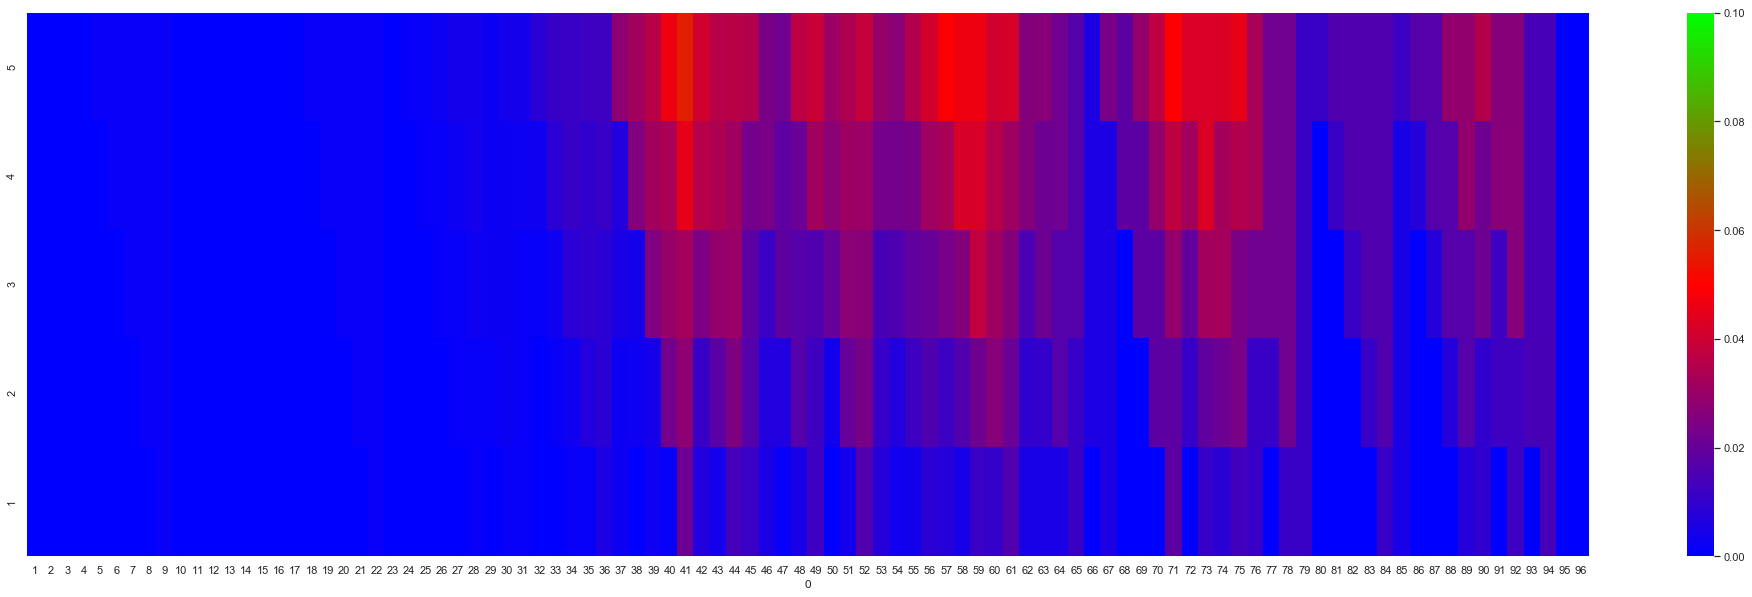

In [19]:
from mpl_toolkits import mplot3d

# data_array = np.array(probabilities)

df = pd.DataFrame(probabilities)
df.set_index(0, inplace = True)
dft= df.T
dft.sort_index(ascending=False, inplace = True)
plt.figure(figsize=(35,10))
sns.heatmap(dft, vmin=0.0, vmax=0.1, cmap='brg')
# sns.heatmap(dft, vmin=0.0, vmax=0.1)
#plt.figure(figsize=(100,10))
#sns.heatmap(dft, annot=True)  
plt.show()